In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## A. Data Manipulation

In [2]:
#load the dataset

customer = pd.read_csv('customer_churn.csv')


In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#a. Find the total number of male customers
sum(customer['gender']=='Male')

3555

In [5]:
#b. Find the total number of customers whose Internet Service is ‘DSL’
sum(customer['InternetService']=="DSL")

2421

In [6]:
#c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’
new_customer=customer[(customer['gender']=='Female') & 
(customer['SeniorCitizen']==1) & (customer['PaymentMethod']=='Mailed check')] 
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


In [7]:
#d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’


customer['TotalCharges'] = pd.to_numeric(customer['TotalCharges'], errors='coerce') # Converting 'TotalCharges' column to numeric since its datatype is object

new_customer = customer[(customer['tenure']< 10) | (customer['TotalCharges']< 500)] 
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


## B. Data Visualization

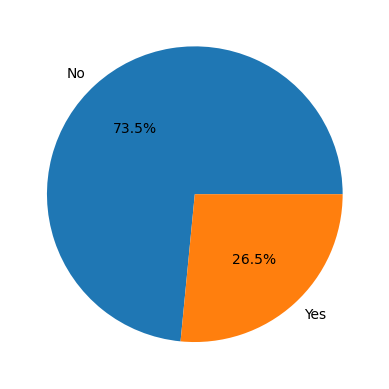

In [8]:
#a. Build a pie-chart to show the distribution of customers would be churning out

names = customer["Churn"].value_counts().keys().tolist() 
sizes= customer["Churn"].value_counts().tolist() 
plt.pie(sizes,labels=names,autopct="%0.1f%%") #‘autopct’ parameter is used to add the percentage distribution in the plot.
plt.show() 



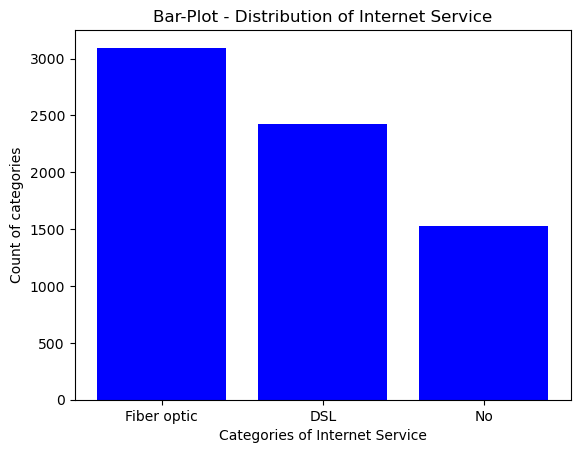

In [9]:
#b. Build a bar-plot to show the distribution of ‘Internet Service’

plt.bar(customer['InternetService'].value_counts().keys().tolist(),customer['InternetService'].value_counts().tolist(),color='blue')
plt.xlabel('Categories of Internet Service') 
plt.ylabel('Count of categories')
plt.title('Bar-Plot - Distribution of Internet Service') 
plt.show() 

## C. Model Building

In [33]:
#a. Build a sequential model using Keras, to find out if the customer would churn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
# Encoding 'Churn' column

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
customer['Churn'] = label_encoder.fit_transform(customer['Churn']) #since the dtype of churn is not 'int'

x= customer[['tenure']]
y = customer[['Churn']]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42) #split dataset into train and test sets , 30% of the records go into the test set, while 70% of the records go into the train set.


### MODEL 1

In [48]:
##create an instance of a sequential model by using Sequential().

from keras.models import Sequential
from keras.layers import Dense


model1 = Sequential()

#i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
model1.add(Dense(12, input_dim=1, activation='relu')) 

#ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
model1.add(Dense(8, activation='relu')) 

## Output layer with 1 node and 'sigmoid' activation function
model1.add(Dense(1, activation='sigmoid')) 

In [50]:
#iii. Use ‘Adam’ as the optimization algorithm 

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 


In [51]:
#iv. Fit the model on the train set, with number of epochs to be 150

history1 = model1.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test))

Train on 4930 samples, validate on 2113 samples
Epoch 1/150
4930/4930 [==============================] - 1s 219us/sample - loss: 0.8621 - acc: 0.6753 - val_loss: 0.5138 - val_acc: 0.7283
Epoch 2/150
4930/4930 [==============================] - 1s 146us/sample - loss: 0.5128 - acc: 0.7373 - val_loss: 0.5157 - val_acc: 0.7283
Epoch 3/150
4930/4930 [==============================] - 1s 193us/sample - loss: 0.5130 - acc: 0.7373 - val_loss: 0.5115 - val_acc: 0.7283
Epoch 4/150
4930/4930 [==============================] - 1s 148us/sample - loss: 0.5138 - acc: 0.7373 - val_loss: 0.5125 - val_acc: 0.7283
Epoch 5/150
4930/4930 [==============================] - 1s 142us/sample - loss: 0.5168 - acc: 0.7373 - val_loss: 0.5102 - val_acc: 0.7283
Epoch 6/150
4930/4930 [==============================] - 1s 141us/sample - loss: 0.5155 - acc: 0.7367 - val_loss: 0.5108 - val_acc: 0.7269
Epoch 7/150
4930/4930 [==============================] - 1s 172us/sample - loss: 0.5138 - acc: 0.7367 - val_loss: 0.51

4930/4930 [==============================] - 1s 132us/sample - loss: 0.5086 - acc: 0.7546 - val_loss: 0.5069 - val_acc: 0.7511
Epoch 118/150
4930/4930 [==============================] - 1s 145us/sample - loss: 0.5082 - acc: 0.7540 - val_loss: 0.5098 - val_acc: 0.7511
Epoch 119/150
4930/4930 [==============================] - 1s 146us/sample - loss: 0.5094 - acc: 0.7544 - val_loss: 0.5069 - val_acc: 0.7511
Epoch 120/150
4930/4930 [==============================] - 1s 158us/sample - loss: 0.5083 - acc: 0.7562 - val_loss: 0.5079 - val_acc: 0.7511
Epoch 121/150
4930/4930 [==============================] - 1s 143us/sample - loss: 0.5136 - acc: 0.7552 - val_loss: 0.5155 - val_acc: 0.7549
Epoch 122/150
4930/4930 [==============================] - 1s 140us/sample - loss: 0.5121 - acc: 0.7546 - val_loss: 0.5068 - val_acc: 0.7511
Epoch 123/150
4930/4930 [==============================] - 1s 141us/sample - loss: 0.5088 - acc: 0.7544 - val_loss: 0.5068 - val_acc: 0.7511
Epoch 124/150
4930/4930 [==

In [52]:
print(model1.history.history.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [53]:
np.mean(model1.history.history['val_acc']) #mean accuracy is 74.11% for model 1

0.741132668654124

In [55]:
#v. Predict the values on the test set and build a confusion matrix 
# Predict the values on the test set
y_pred1 = (model1.predict(x_test) > 0.5).astype("int32")

# Build confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix1 = confusion_matrix(y_test, y_pred1)



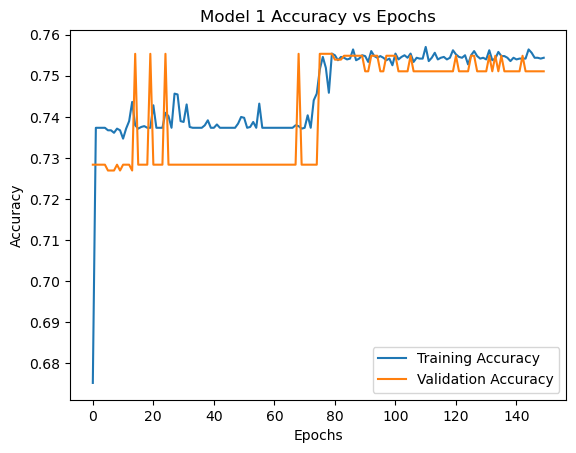

In [56]:
#vi. Plot the ‘Accuracy vs Epochs’ graph

plt.plot(history1.history['acc'], label='Training Accuracy')
plt.plot(history1.history['val_acc'], label='Validation Accuracy')
plt.title('Model 1 Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### MODEL 2

In [60]:
#b. Build the 2nd model using same target and feature variables:

from keras.layers import Dropout 

model2 = Sequential() 
model2.add(Dense(12, input_dim=1, activation='relu')) 
model2.add(Dropout(0.3)) #i. Add a drop-out layer after the input layer with drop-out value of 0.3
model2.add(Dense(8, activation='relu')) 
model2.add(Dropout(0.2))  #ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2 
model2.add(Dense(1, activation='sigmoid')) 

In [62]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [63]:

history2 = model2.fit(x_train, y_train, epochs=150, validation_data=(x_test,y_test))


Train on 4930 samples, validate on 2113 samples
Epoch 1/150
4930/4930 [==============================] - 1s 266us/sample - loss: 0.5262 - acc: 0.7373 - val_loss: 0.5256 - val_acc: 0.7283
Epoch 2/150
4930/4930 [==============================] - 1s 157us/sample - loss: 0.5251 - acc: 0.7373 - val_loss: 0.5234 - val_acc: 0.7283
Epoch 3/150
4930/4930 [==============================] - 1s 150us/sample - loss: 0.5265 - acc: 0.7373 - val_loss: 0.5250 - val_acc: 0.7283
Epoch 4/150
4930/4930 [==============================] - 1s 158us/sample - loss: 0.5274 - acc: 0.7373 - val_loss: 0.5269 - val_acc: 0.7283
Epoch 5/150
4930/4930 [==============================] - 1s 159us/sample - loss: 0.5225 - acc: 0.7373 - val_loss: 0.5197 - val_acc: 0.7283
Epoch 6/150
4930/4930 [==============================] - 1s 155us/sample - loss: 0.5239 - acc: 0.7373 - val_loss: 0.5261 - val_acc: 0.7283
Epoch 7/150
4930/4930 [==============================] - 1s 159us/sample - loss: 0.5242 - acc: 0.7373 - val_loss: 0.52

4930/4930 [==============================] - 1s 152us/sample - loss: 0.5260 - acc: 0.7373 - val_loss: 0.5254 - val_acc: 0.7283
Epoch 60/150
4930/4930 [==============================] - 1s 167us/sample - loss: 0.5252 - acc: 0.7373 - val_loss: 0.5288 - val_acc: 0.7283
Epoch 61/150
4930/4930 [==============================] - 1s 163us/sample - loss: 0.5224 - acc: 0.7373 - val_loss: 0.5291 - val_acc: 0.7283
Epoch 62/150
4930/4930 [==============================] - 1s 146us/sample - loss: 0.5281 - acc: 0.7373 - val_loss: 0.5216 - val_acc: 0.7283
Epoch 63/150
4930/4930 [==============================] - 1s 152us/sample - loss: 0.5260 - acc: 0.7373 - val_loss: 0.5269 - val_acc: 0.7283
Epoch 64/150
4930/4930 [==============================] - 1s 155us/sample - loss: 0.5257 - acc: 0.7373 - val_loss: 0.5256 - val_acc: 0.7283
Epoch 65/150
4930/4930 [==============================] - 1s 152us/sample - loss: 0.5238 - acc: 0.7373 - val_loss: 0.5272 - val_acc: 0.7283
Epoch 66/150
4930/4930 [=========

4930/4930 [==============================] - 1s 185us/sample - loss: 0.5240 - acc: 0.7373 - val_loss: 0.5267 - val_acc: 0.7283
Epoch 118/150
4930/4930 [==============================] - 1s 158us/sample - loss: 0.5223 - acc: 0.7373 - val_loss: 0.5238 - val_acc: 0.7283
Epoch 119/150
4930/4930 [==============================] - 1s 162us/sample - loss: 0.5259 - acc: 0.7373 - val_loss: 0.5244 - val_acc: 0.7283
Epoch 120/150
4930/4930 [==============================] - 1s 145us/sample - loss: 0.5284 - acc: 0.7373 - val_loss: 0.5309 - val_acc: 0.7283
Epoch 121/150
4930/4930 [==============================] - 1s 151us/sample - loss: 0.5217 - acc: 0.7373 - val_loss: 0.5261 - val_acc: 0.7283
Epoch 122/150
4930/4930 [==============================] - 1s 173us/sample - loss: 0.5241 - acc: 0.7373 - val_loss: 0.5231 - val_acc: 0.7283
Epoch 123/150
4930/4930 [==============================] - 1s 148us/sample - loss: 0.5207 - acc: 0.7373 - val_loss: 0.5236 - val_acc: 0.7283
Epoch 124/150
4930/4930 [==

In [66]:
#iii. Predict the values on the test set and build a confusion matrix 

# Predict the values on the test set
y_pred2 = (model2.predict(x_test) > 0.5).astype("int32")  # Convert probabilities to class labels (0 or 1)

from sklearn.metrics import confusion_matrix

conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix (Model 2):")
print(conf_matrix2)

Confusion Matrix (Model 2):
[[1539    0]
 [ 574    0]]


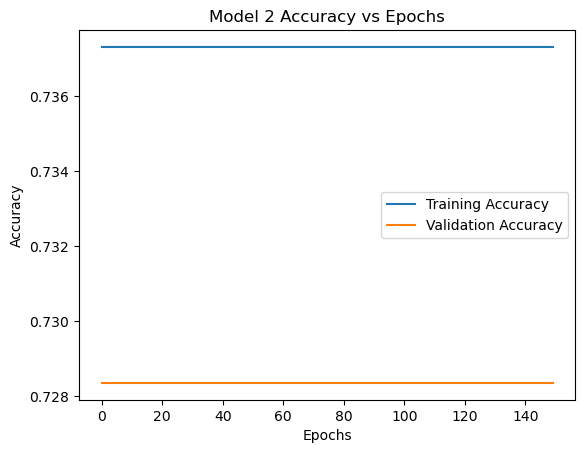

In [68]:
#iv. Plot the ‘Accuracy vs Epochs 2’ graph

plt.plot(history2.history['acc'], label='Training Accuracy')
plt.plot(history2.history['val_acc'], label='Validation Accuracy')
plt.title('Model 2 Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [87]:
np.mean(model2.history.history['val_acc']) 

0.7283483147621155

### MODEL 3

In [77]:
#c.Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
customer['Churn'] = label_encoder.fit_transform(customer['Churn'])

x3 = customer[['MonthlyCharges','tenure','TotalCharges']] #Features 
y3 = customer[['Churn']] #target 

#i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

from sklearn.model_selection import train_test_split 

x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size=0.30,random_state=42) 

model3 = Sequential() 
model3.add(Dense(12, input_dim=3, activation='relu')) 
model3.add(Dense(8, activation='relu')) 
model3.add(Dense(1, activation='sigmoid')) 



In [78]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 


In [80]:
history3 = model3.fit(x_train3, y_train3, epochs=150, validation_data=(x_test3,y_test3)) 



Train on 4930 samples, validate on 2113 samples
Epoch 1/150
4930/4930 [==============================] - 0s 79us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5851 - val_acc: 0.7283
Epoch 2/150
4930/4930 [==============================] - 0s 81us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5852 - val_acc: 0.7283
Epoch 3/150
4930/4930 [==============================] - 0s 88us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5851 - val_acc: 0.7283
Epoch 4/150
4930/4930 [==============================] - 0s 81us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5851 - val_acc: 0.7283
Epoch 5/150
4930/4930 [==============================] - 0s 98us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5851 - val_acc: 0.7283
Epoch 6/150
4930/4930 [==============================] - 0s 83us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5851 - val_acc: 0.7283
Epoch 7/150
4930/4930 [==============================] - 0s 81us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5851 - va

4930/4930 [==============================] - 0s 85us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5851 - val_acc: 0.7283
Epoch 60/150
4930/4930 [==============================] - 0s 84us/sample - loss: 0.5758 - acc: 0.7373 - val_loss: 0.5851 - val_acc: 0.7283
Epoch 61/150
4930/4930 [==============================] - 0s 81us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5851 - val_acc: 0.7283
Epoch 62/150
4930/4930 [==============================] - 0s 88us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5851 - val_acc: 0.7283
Epoch 63/150
4930/4930 [==============================] - 0s 87us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5851 - val_acc: 0.7283
Epoch 64/150
4930/4930 [==============================] - 0s 81us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5851 - val_acc: 0.7283
Epoch 65/150
4930/4930 [==============================] - 0s 84us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5851 - val_acc: 0.7283
Epoch 66/150
4930/4930 [================

Epoch 118/150
4930/4930 [==============================] - 1s 102us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5850 - val_acc: 0.7283
Epoch 119/150
4930/4930 [==============================] - 1s 105us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5851 - val_acc: 0.7283
Epoch 120/150
4930/4930 [==============================] - 1s 105us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5851 - val_acc: 0.7283
Epoch 121/150
4930/4930 [==============================] - 1s 104us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5850 - val_acc: 0.7283
Epoch 122/150
4930/4930 [==============================] - 1s 106us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5851 - val_acc: 0.7283
Epoch 123/150
4930/4930 [==============================] - 1s 103us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5850 - val_acc: 0.7283
Epoch 124/150
4930/4930 [==============================] - 0s 95us/sample - loss: 0.5759 - acc: 0.7373 - val_loss: 0.5850 - val_acc: 0.7283
Epoch 125/150


In [82]:
y_pred3 = (model3.predict(x_test3) > 0.5).astype("int32")

conf_matrix3 = confusion_matrix(y_test3, y_pred3)
print("Confusion Matrix (Model 3):")
print(conf_matrix3)

Confusion Matrix (Model 3):
[[1539    0]
 [ 574    0]]


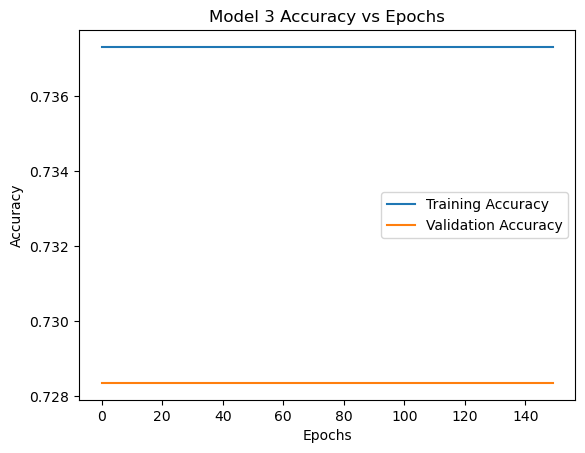

In [84]:
# Plot Accuracy vs Epochs for Model 3

plt.plot(history3.history['acc'], label='Training Accuracy')
plt.plot(history3.history['val_acc'], label='Validation Accuracy')
plt.title('Model 3 Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [86]:
np.mean(model3.history.history['val_acc']) #mean validation comes out to be 72.83% for model 3


0.7283483147621155